<a href="https://colab.research.google.com/github/mvdantas/Data-Science/blob/master/Copy_of_C%C3%B3pia_de_dividends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [ ]:
yf.Ticker('AAPL').info

{'52WeekChange': 0.29134881,
 'SandP52WeekChange': 0.31772637,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 149.76,
 'askSize': 1100,
 'averageDailyVolume10Day': 82491860,
 'averageVolume': 78489468,
 'averageVolume10days': 82491860,
 'beta': 1.201965,
 'beta3Year': None,
 'bid': 149.75,
 'bidSize': 1300,
 'bookValue': 3.882,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 149.55,
 'currentRatio': 1.062,
 'dateShortInterest': 1630368000,
 'dayHigh': 151.41,
 'dayLow': 148.75,
 'debtToEquity': 210.782,
 'dividendRate': 0.88,
 'dividendYield': 0.0058999998,
 'earningsGrowth': 1,
 'earningsQuarterlyGrowth': 0.932,
 'ebitda': 110934999040,
 'ebitdaMargins': 0.31955,
 'enterpriseToEbitda': 22.863,
 'enterpriseToRevenue': 7.306,
 'enterpriseValue': 2536293793792,
 'exDividendDate': 1628208000,
 'ex

In [ ]:
tickers = ['PETR4.SA','VALE3.SA','ITUB4.SA','B3SA3.SA']

In [ ]:
infos = []
for i in tickers:
  infos.append(yf.Ticker(i).info)

In [ ]:
fundamentals = ['dividendYield', 'payoutRatio','beta', ]

In [ ]:
df = pd.DataFrame(infos)

In [ ]:
df.head()

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,address2,ebitdaMargins,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,targetLowPrice,recommendationKey,grossProfits,freeCashflow,targetMedianPrice,currentPrice,earningsGrowth,currentRatio,returnOnAssets,numberOfAnalystOpinions,targetMeanPrice,debtToEquity,returnOnEquity,targetHighPrice,totalCash,totalDebt,totalRevenue,totalCashPerShare,financialCurrency,...,navPrice,averageDailyVolume10Day,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,algorithm,dividendRate,exDividendDate,circulatingSupply,startDate,regularMarketDayLow,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,dayLow,ask,askSize,volume,fiftyTwoWeekHigh,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url
0,20031-912,Energy,49050.0,PetrÃ³leo Brasileiro S.A. - Petrobras produce ...,Rio De Janeiro,55 21 3224 4477,RJ,Brazil,[],http://petrobras.com.br/pt,1,"Avenida RepUblica do Chile, 65",Oil & Gas Integrated,Centro,0.55503,0.34234,0.58580,180439007232,1.116,0.40925,1.659650e+11,None,none,123962000000,1.076691e+11,None,26.23,NaN,1.307,0.07818,None,None,87.908,0.33908,None,52138999808,318568988672,299019993088,3.997,BRL,...,None,79994520,25.34,27.289143,0.793,25.80,None,79994520,None,None,3.22,1638403200,None,None,25.64,BRL,3.342253,63014100,None,None,None,347773075456,None,None,69280118,25.64,26.27,0,63014100,31.760000,None,NaN,17.74,26.27,False,0.1269,0,26.39,26.23,https://logo.clearbit.com/petrobras.com.br
1,22250-145,Basic Materials,74316.0,"Vale S.A., together with its subsidiaries, pro...",Rio De Janeiro,55 21 3485 3900,RJ,Brazil,[],http://www.vale.com,1,Praia de Botafogo 186,Other Industrial Metals & Mining,Salas 501 a 1901 18 andar Botafogo,0.63302,0.30987,0.61635,139427004416,1.173,0.57671,1.861020e+11,None,none,109829000000,9.566813e+10,None,94.76,6.628,1.772,0.22568,None,None,45.644,0.45582,None,73571000320,96730996736,293992005632,14.604,BRL,...,None,24039660,94.81,104.374855,6.439,94.70,None,24039660,None,None,8.86,1624492800,None,None,93.94,BRL,5.327786,18795800,None,None,None,474660405248,None,None,22749501,93.94,94.77,0,18795800,120.450000,None,NaN,57.06,94.57,False,0.0934,0,95.00,94.76,https://logo.clearbit.com/vale.com
2,04344-902,Financial Services,98300.0,ItaÃº Unibanco Holding S.A. provides a range o...,SÃ£o Paulo,55 11 5019 1267,SP,Brazil,[],http://www.itau.com.br,1,PraCa Alfredo Egydio de Souza Aranha,Banks—Regional,"100,Torre Olavo Setubal Parque Jabaquara",0.00000,0.25373,0.00000,-64917000192,0.744,0.42730,NaN,None,none,74219000000,NaN,None,29.17,3.869,NaN,0.01444,None,None,NaN,0.19000,None,353521008640,587949015040,109571997696,36.148,BRL,...,None,43285560,28.81,30.278572,0.461,29.33,None,43285560,None,None,0.70,1633046400,None,None,28.95,BRL,10.296506,30969800,None,None,None,275188613120,None,None,32994876,28.95,29.12,0,30969800,34.340000,None,2.84,22.18,29.12,False,0.0243,0,29.42,29.17,https://logo.clearbit.com/itau.com.br
3,18970-020,Financial Services,NaN,"B3 S.A. - Brasil, Bolsa, BalcÃ£o, a financial ...",SÃ£o Paulo,NaN,SP,Brazil,[],http://www.b3.com.br,1,"PraCa Antonio Prado, 48",Financial Data & Stock Exchanges,"Rua XV de Novembro, 275 Centro",0.63093,0.49915,0.97533,2523670016,0.267,0.66526,5.920312e+09,None,none,8190786000,9.401801e+09,None,14.20,0.349,1.589,0.08325,None,None,47.463,0.19407,None,18330218496,10776086528,9383440384,3.018,BRL,...,None,49545580,13.81,14.623714,0.156,14.11,None,49545580,None,None,0.86,1625011200,None,None,13.93,BRL,18.562092,36188100,None,None,None,86234333184,None,None,38395873,13.93,14.24,0,36188100,21.366667,None,2.52,13.07,14.22,False,0.0622,0,14.39,14.20,https://logo.clearbit.com/b3.com.br


In [ ]:
df = df.set_index('symbol')

In [ ]:
df.head()

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,address2,ebitdaMargins,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,targetLowPrice,recommendationKey,grossProfits,freeCashflow,targetMedianPrice,currentPrice,earningsGrowth,currentRatio,returnOnAssets,numberOfAnalystOpinions,targetMeanPrice,debtToEquity,returnOnEquity,targetHighPrice,totalCash,totalDebt,totalRevenue,totalCashPerShare,financialCurrency,...,navPrice,averageDailyVolume10Day,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,algorithm,dividendRate,exDividendDate,circulatingSupply,startDate,regularMarketDayLow,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,dayLow,ask,askSize,volume,fiftyTwoWeekHigh,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PETR4.SA,20031-912,Energy,49050.0,PetrÃ³leo Brasileiro S.A. - Petrobras produce ...,Rio De Janeiro,55 21 3224 4477,RJ,Brazil,[],http://petrobras.com.br/pt,1,"Avenida RepUblica do Chile, 65",Oil & Gas Integrated,Centro,0.55503,0.34234,0.58580,180439007232,1.116,0.40925,1.659650e+11,None,none,123962000000,1.076691e+11,None,26.23,NaN,1.307,0.07818,None,None,87.908,0.33908,None,52138999808,318568988672,299019993088,3.997,BRL,...,None,79994520,25.34,27.289143,0.793,25.80,None,79994520,None,None,3.22,1638403200,None,None,25.64,BRL,3.342253,63014100,None,None,None,347773075456,None,None,69280118,25.64,26.27,0,63014100,31.760000,None,NaN,17.74,26.27,False,0.1269,0,26.39,26.23,https://logo.clearbit.com/petrobras.com.br
VALE3.SA,22250-145,Basic Materials,74316.0,"Vale S.A., together with its subsidiaries, pro...",Rio De Janeiro,55 21 3485 3900,RJ,Brazil,[],http://www.vale.com,1,Praia de Botafogo 186,Other Industrial Metals & Mining,Salas 501 a 1901 18 andar Botafogo,0.63302,0.30987,0.61635,139427004416,1.173,0.57671,1.861020e+11,None,none,109829000000,9.566813e+10,None,94.76,6.628,1.772,0.22568,None,None,45.644,0.45582,None,73571000320,96730996736,293992005632,14.604,BRL,...,None,24039660,94.81,104.374855,6.439,94.70,None,24039660,None,None,8.86,1624492800,None,None,93.94,BRL,5.327786,18795800,None,None,None,474660405248,None,None,22749501,93.94,94.77,0,18795800,120.450000,None,NaN,57.06,94.57,False,0.0934,0,95.00,94.76,https://logo.clearbit.com/vale.com
ITUB4.SA,04344-902,Financial Services,98300.0,ItaÃº Unibanco Holding S.A. provides a range o...,SÃ£o Paulo,55 11 5019 1267,SP,Brazil,[],http://www.itau.com.br,1,PraCa Alfredo Egydio de Souza Aranha,Banks—Regional,"100,Torre Olavo Setubal Parque Jabaquara",0.00000,0.25373,0.00000,-64917000192,0.744,0.42730,NaN,None,none,74219000000,NaN,None,29.17,3.869,NaN,0.01444,None,None,NaN,0.19000,None,353521008640,587949015040,109571997696,36.148,BRL,...,None,43285560,28.81,30.278572,0.461,29.33,None,43285560,None,None,0.70,1633046400,None,None,28.95,BRL,10.296506,30969800,None,None,None,275188613120,None,None,32994876,28.95,29.12,0,30969800,34.340000,None,2.84,22.18,29.12,False,0.0243,0,29.42,29.17,https://logo.clearbit.com/itau.com.br
B3SA3.SA,18970-020,Financial Services,NaN,"B3 S.A. - Brasil, Bolsa, BalcÃ£o, a financial ...",SÃ£o Paulo,NaN,SP,Brazil,[],http://www.b3.com.br,1,"PraCa Antonio Prado, 48",Financial Data & Stock Exchanges,"Rua XV de Novembro, 275 Centro",0.63093,0.49915,0.97533,2523670016,0.267,0.66526,5.920312e+09,None,none,8190786000,9.401801e+09,None,14.20,0.349,1.589,0.08325,None,None,47.463,0.19407,None,18330218496,10776086528,9383440384,3.018,BRL,...,None,49545580,13.81,14.623714,0.156,14.11,None,49545580,None,None,0.86,1625011200,None,None,13.93,BRL,18.562092,36188100,None,None,None,86234333184,None,None,38395873,13.93,14.24,0,36188100,21.366667,None,2.52,

In [ ]:
df = df.sort_values(by= "symbol", ascending = True)
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,address2,ebitdaMargins,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,targetLowPrice,recommendationKey,grossProfits,freeCashflow,targetMedianPrice,currentPrice,earningsGrowth,currentRatio,returnOnAssets,numberOfAnalystOpinions,targetMeanPrice,debtToEquity,returnOnEquity,targetHighPrice,totalCash,totalDebt,totalRevenue,totalCashPerShare,financialCurrency,...,navPrice,averageDailyVolume10Day,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,algorithm,dividendRate,exDividendDate,circulatingSupply,startDate,regularMarketDayLow,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,dayLow,ask,askSize,volume,fiftyTwoWeekHigh,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B3SA3.SA,18970-020,Financial Services,NaN,"B3 S.A. - Brasil, Bolsa, BalcÃ£o, a financial ...",SÃ£o Paulo,NaN,SP,Brazil,[],http://www.b3.com.br,1,"PraCa Antonio Prado, 48",Financial Data & Stock Exchanges,"Rua XV de Novembro, 275 Centro",0.63093,0.49915,0.97533,2523670016,0.267,0.66526,5.920312e+09,None,none,8190786000,9.401801e+09,None,14.20,0.349,1.589,0.08325,None,None,47.463,0.19407,None,18330218496,10776086528,9383440384,3.018,BRL,...,None,49545580,13.81,14.623714,0.156,14.11,None,49545580,None,None,0.86,1625011200,None,None,13.93,BRL,18.562092,36188100,None,None,None,86234333184,None,None,38395873,13.93,14.24,0,36188100,21.366667,None,2.52,13.07,14.22,False,0.0622,0,14.39,14.20,https://logo.clearbit.com/b3.com.br
ITUB4.SA,04344-902,Financial Services,98300.0,ItaÃº Unibanco Holding S.A. provides a range o...,SÃ£o Paulo,55 11 5019 1267,SP,Brazil,[],http://www.itau.com.br,1,PraCa Alfredo Egydio de Souza Aranha,Banks—Regional,"100,Torre Olavo Setubal Parque Jabaquara",0.00000,0.25373,0.00000,-64917000192,0.744,0.42730,NaN,None,none,74219000000,NaN,None,29.17,3.869,NaN,0.01444,None,None,NaN,0.19000,None,353521008640,587949015040,109571997696,36.148,BRL,...,None,43285560,28.81,30.278572,0.461,29.33,None,43285560,None,None,0.70,1633046400,None,None,28.95,BRL,10.296506,30969800,None,None,None,275188613120,None,None,32994876,28.95,29.12,0,30969800,34.340000,None,2.84,22.18,29.12,False,0.0243,0,29.42,29.17,https://logo.clearbit.com/itau.com.br
PETR4.SA,20031-912,Energy,49050.0,PetrÃ³leo Brasileiro S.A. - Petrobras produce ...,Rio De Janeiro,55 21 3224 4477,RJ,Brazil,[],http://petrobras.com.br/pt,1,"Avenida RepUblica do Chile, 65",Oil & Gas Integrated,Centro,0.55503,0.34234,0.58580,180439007232,1.116,0.40925,1.659650e+11,None,none,123962000000,1.076691e+11,None,26.23,NaN,1.307,0.07818,None,None,87.908,0.33908,None,52138999808,318568988672,299019993088,3.997,BRL,...,None,79994520,25.34,27.289143,0.793,25.80,None,79994520,None,None,3.22,1638403200,None,None,25.64,BRL,3.342253,63014100,None,None,None,347773075456,None,None,69280118,25.64,26.27,0,63014100,31.760000,None,NaN,17.74,26.27,False,0.1269,0,26.39,26.23,https://logo.clearbit.com/petrobras.com.br
VALE3.SA,22250-145,Basic Materials,74316.0,"Vale S.A., together with its subsidiaries, pro...",Rio De Janeiro,55 21 3485 3900,RJ,Brazil,[],http://www.vale.com,1,Praia de Botafogo 186,Other Industrial Metals & Mining,Salas 501 a 1901 18 andar Botafogo,0.63302,0.30987,0.61635,139427004416,1.173,0.57671,1.861020e+11,None,none,109829000000,9.566813e+10,None,94.76,6.628,1.772,0.22568,None,None,45.644,0.45582,None,73571000320,96730996736,293992005632,14.604,BRL,...,None,24039660,94.81,104.374855,6.439,94.70,None,24039660,None,None,8.86,1624492800,None,None,93.94,BRL,5.327786,18795800,None,None,None,474660405248,None,None,22749501,93.94,94.77,0,18795800,120.450000,None,NaN

In [ ]:
df[df.columns[df.columns.isin(fundamentals)]]

,beta,payoutRatio,dividendYield
symbol,,,
B3SA3.SA,0.848811,1.0911,0.0622
ITUB4.SA,0.981157,0.2468,0.0243
PETR4.SA,1.399730,0.0984,0.1269
VALE3.SA,0.545536,0.4998,0.0934


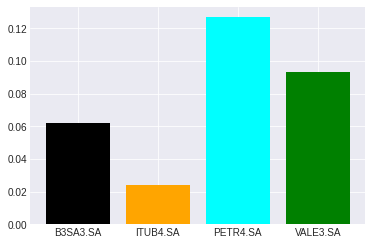

In [ ]:
plt.bar(df.index, df.dividendYield,color= ('k','orange','cyan','green'))
plt.show()

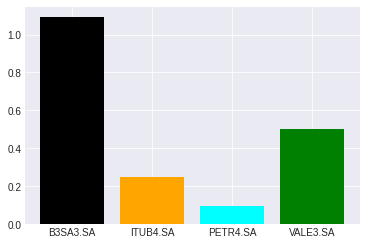

In [ ]:
plt.bar(df.index, df.payoutRatio,color= ('k','orange','cyan','green'))
plt.show()

In [ ]:
df['dividendYield'].nlargest(3)

symbol
PETR4.SA    0.1269
VALE3.SA    0.0934
B3SA3.SA    0.0622
Name: dividendYield, dtype: float64

In [ ]:
#from google.colab import drive
#drive.mount('/drive')

In [ ]:
#df.to_excel(''/drive/My Drive/folder_name/name_csv_file.csv'')

In [ ]:
df2 = yf.download(tickers,period="1d")['Adj Close']
df2.head()

[*********************100%***********************]  4 of 4 completed


,B3SA3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,
2021-09-13,14.2,29.17,26.23,94.760002


In [ ]:
df2.T

Date,2021-09-13
B3SA3.SA,14.200000
ITUB4.SA,29.170000
PETR4.SA,26.230000
VALE3.SA,94.760002
